In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0):

    # Fixing random seed
    np.random.seed(1)

    Z = np.random.normal(0.0,1.0,[NoOfPaths,NoOfSteps])
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    S = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])

    X[:,0] = np.log(S_0)

    dt = T / float(NoOfSteps)
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:,i] = (Z[:,i] - np.mean(Z[:,i])) / np.std(Z[:,i])

        X[:,i+1] = X[:,i] + (r - 0.5 * sigma **2 ) * dt + sigma * np.power(dt, 0.5)*Z[:,i]
        time[i+1] = time[i] +dt

    #Compute exponent of ABM
    S = np.exp(X)
    paths = {"time":time,"X":X,"S":S}
    return paths

def mainCalculation():
    NoOfPaths = 250
    NoOfSteps = 500

    T = 1
    r = 0.05
    sigma = 0.4
    S_0 = 100

    M = lambda r,t: np.exp(r*t)     ### Defining a function M with two parameters r & t as exp(r*t)

    Paths = GeneratePathsGBMABM(NoOfPaths,NoOfSteps,T,r,sigma,S_0)
    timeGrid = Paths["time"]
    X = Paths["X"]
    S = Paths["S"]

    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")

    plt.figure(2)
    plt.plot(timeGrid, np.transpose(S))
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("S(t)")

    # checking martingale property
    ES = np.mean(S[:,-1])
    print("Expected Value of Stock in the future is " + str(ES) + " with current stock value 100 so not a martingale")

    ESM = np.mean(S[:,-1]/M(r,T))
    print("Expected Value of S/M in the future is " + str(ESM) + " with current stock value 100 so a martingale; accuracy can be improved by increasing no of paths / steps")


Expected Value of Stock in the future is 105.58065809716639 with current stock value 100 so not a martingale
Expected Value of S/M in the future is 100.43142864017425 with current stock value 100 so a martingale; accuracy can be improved by increasing no of paths / steps


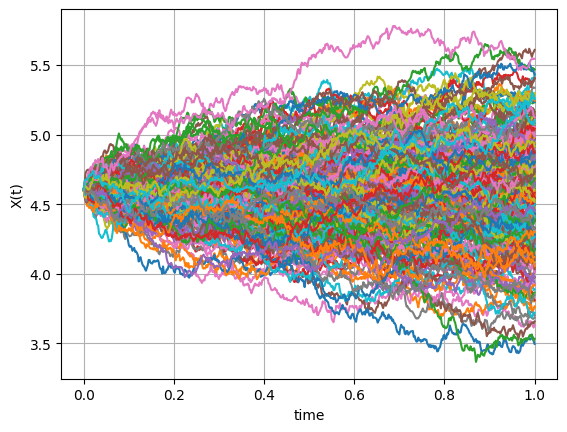

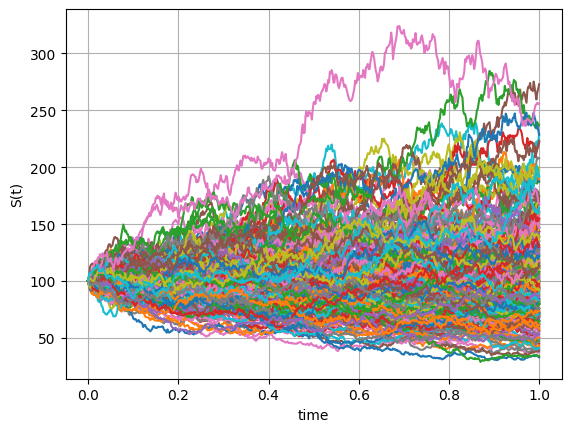

In [13]:
mainCalculation()